In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [3]:
insurance_data = 'Data/insurance - insurance.csv'
ins_df = pd.read_csv(insurance_data)
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Answering the following questions using hypothesis testing.

Do smokers have higher insurance charges than non-smokers?

Are men more likely to smoke than women?

Do different regions have different charges, on average?

# Do smokers have higher insurance charges than non-smokers?

Null Hypothesis - Smoker and non-smokers are not charged differently for insurance.

Alternate Hypothesis - Smokers have higher insurance charges than non-smokers.


Data is: Numeric

Number of samples: Two; Smokers and Non-Smokers

Therefore, the appropriate test is: 2 Sample T Test


The target column is: charges

The column that determines our groups: smoker

In [5]:
ins_df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
ins_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
ins_df['a_smoker'] = ins_df['smoker'].str.contains('yes')
ins_df['a_smoker'].value_counts(normalize=True)

False    0.795217
True     0.204783
Name: a_smoker, dtype: float64

In [8]:
needed_cols = ['a_smoker','charges']

In [9]:
non_smoker = ins_df.loc[ins_df['a_smoker'] == False, needed_cols]
non_smoker

,a_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [10]:
smoker = ins_df.loc[ins_df['a_smoker'] == True, needed_cols]
smoker

,a_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [11]:
plot = pd.concat([non_smoker,smoker])
plot

,a_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


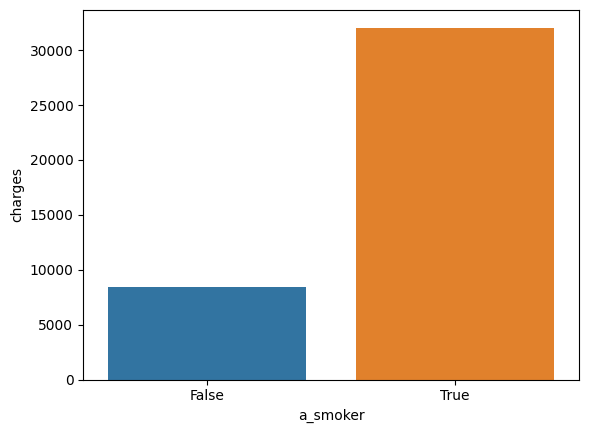

In [12]:
sns.barplot(data=plot, x = 'a_smoker', y = 'charges', ci = None);

Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

In [28]:
smoker_group = smoker['charges']
non_smoker_group = non_smoker['charges']
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [29]:
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3

smoker_outliers.value_counts()

#for outliers use smoker_group = smoker_group[~smoker_outliers] 

False    274
Name: charges, dtype: int64

In [30]:
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3

non_smoker_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [31]:
non_smoker_group = non_smoker_group[~non_smoker_outliers]

We have passed the assumption of no significant outliers.

In [32]:
results = stats.normaltest(smoker_group)
results

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [33]:
len(smoker_group)

274

In [34]:
results2 = stats.normaltest(non_smoker_group)
results2

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [19]:
len(non_smoker_group)

1064

Because the length of both groups is greater than 20, we have passed the assumption of normality.

In [35]:
res = stats.levene(smoker_group,non_smoker_group)
res

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [36]:
if res.pvalue < 0.05:
    print("The groups do not have equal variance")
else:
    print("The groups do have equal variance")

The groups do not have equal variance


We have not passed the assumption. We must now be careful to those the correct test.

# Final Hypothesis Test

In [37]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var = False) #equal_var = True
result.pvalue<.05

True

In [38]:
smoker_group.mean()

32050.23183153284

In [39]:
non_smoker_group.mean()

7939.8608446721155

    A. Final Conclusion
    - p < alpha so we reject the null hypothesis and support the alternative hypothesis.
    - Smokers have higher insurance charges than non-smokers.

In [44]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges,a_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [45]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   a_smoker  1338 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 74.6+ KB


# Are men more likely to smoke than women?

Null Hypothesis - Men are not more likely to smoke than women.

Alternate Hypothesis - Men are more likely to smoke than women.


Data is: Categorical

Number of samples: Two; sex and smoker

Therefore, the appropriate test is: Chi-Square test


The target column is: Sex

The column that determines our groups: smoker

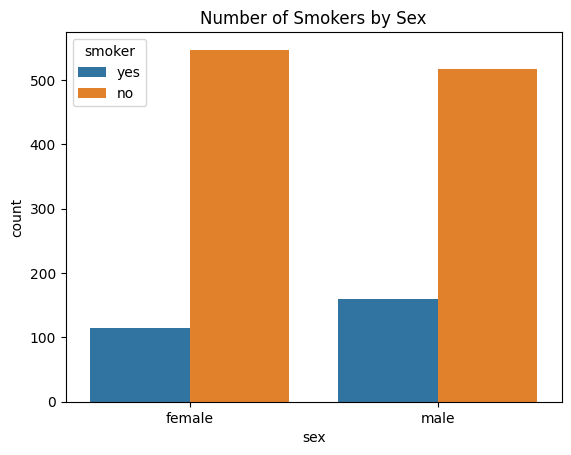

In [47]:
ax = sns.countplot(data=ins_df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [49]:
table = pd.crosstab(ins_df['sex'], ins_df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [50]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [51]:
print(p)
p<.05

0.006548143503580696


True

    A. Final Conclusion
    - p < alpha so we reject the null hypothesis and support the alternative hypothesis.
    - Men are more likely to smoke than women.

In [52]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges,a_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [53]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   a_smoker  1338 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 74.6+ KB


# Do different regions have different charges, on average?

Null Hypothesis - On average, different regions do not have different charges.

Alternate Hypothesis - On average, different regions have different charges.


Data is: Numeric

Number of samples: More Than Two (regions)

Therefore, the appropriate test is: ANOVA


The target column is: charges

The column that determines our groups: region

In [55]:
# check for how many different regions, if there are more than 2
ins_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

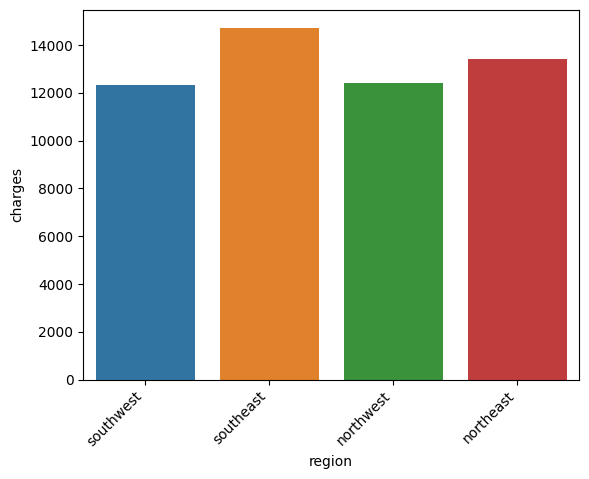

In [57]:
ax1 = sns.barplot(data=ins_df,x='region',y='charges', ci = None)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,ha='right');

In [58]:
needed_cols2 = ['region','charges']
ins_df[needed_cols2]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [60]:
groups = {}

for s in ins_df['region'].unique():
    temp = ins_df.loc[ins_df['region']==s, 'charges']
    groups[s]=temp

In [61]:
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [62]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

In [68]:
temp = np.abs(stats.zscore(groups['southwest'])) > 3
temp.value_counts()

False    317
True       8
Name: charges, dtype: int64

In [69]:
for s, d in groups.items():
    outliers = np.abs(stats.zscore(d)) > 3
    print(f"There were {outliers.sum()} outliers in the {s} group.")
    d = d.loc[~outliers]
    groups[s] = d

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


We pass the assumption of no significant outliers.

In [70]:
stats.normaltest(groups['southwest']).pvalue<.05

True

In [73]:
norm_results = [['group','n','pval','sig?']]

for s, d in groups.items():
    stat, p = stats.normaltest(d)
    norm_results.append([s,len(d),p,p<.05])
    
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,317,7.728611e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


Because the length of all groups is greater than 20, we have passed the assumption of normality.

In [74]:
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [75]:
if result.pvalue < 0.05:
    print("The groups do not have equal variance")
else:
    print("The groups do have equal variance")

The groups do not have equal variance


We did not pass the assumption of equal variance. We must now choose the correct test.

In [76]:
result2 = stats.kruskal(*groups.values())
print(result2)
result2.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

    A. Final Conclusion
    - p > alpha so we have failed reject the null hypothesis. The alternative hypothesis is not supported.
    - Men are not more likely to smoke than women.